## Detector de imagenes  
En este proyecto muestro como gracias a la deteccion de objetos podemos hacer que la IA sepa que tipo de objetos se encentra en la imagen que le mostremos 

In [1]:
import cv2
import numpy as n
from IPython.display import Image

In [2]:
import cv2
import numpy as np

config = 'model 2/yolov3.cfg'

weights = 'model 2/yolov3.weights'

LABELS = open('model 2/coco.names').read().split('\n')

colors = np.random.randint(0, 255, size = (len(LABELS), 3), dtype = 'uint8')
print('color.shape:', colors.shape)

net = cv2.dnn.readNetFromDarknet(config, weights)

image = cv2.imread('Ciudad-que-queremos-Buenos-Aires-ciudadana-urbanismo-movilidad-congreso-Caminito-barrio (1).png')
height, width, _ = image.shape

blob =cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB = True, crop = False)
print('blob.shape:', blob.shape)

ln = net.getLayerNames()
# print('ln:', ln)

ln = [ln[i - 1]for i in net.getUnconnectedOutLayers()]
# print('ln:', ln)

net.setInput(blob)
outputs = net.forward(ln)
# print('outputs: ', outputs)

boxes = []
confidences = []
classIDs = []

for output in outputs:
    for detection in output:
        #print('detection:', detection)
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        
        if confidence > 0.5:
            #print('detection:', detection)
            #print('classID:', classID)
            box = detection[:4] * np.array([width, height, width, height])
            # print('box:', box)
            (x_center, y_center, w, h) = box.astype('int')
            # print((x_center, y_center, w, h))
            x = int(x_center - (w / 2))
            y = int(y_center - (h / 2))
            # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            boxes.append([x, y,w, h])
            confidences.append(float(confidence))
            classIDs.append(classID)
            
idx = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
print('idx:', idx)

if len(idx) > 0:
    for i in idx:
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        
        color = colors[classIDs[i]].tolist()
        text = "{}: [:.3f]".format(LABELS[classIDs[i]], confidences[i])
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)            

cv2.imshow('Image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

color.shape: (81, 3)
blob.shape: (1, 3, 416, 416)
idx: [ 7  9  3 18  0 13 16 15 20 12 17 19  2 22]


## Aqui muestro el resultado del detector de imagenes


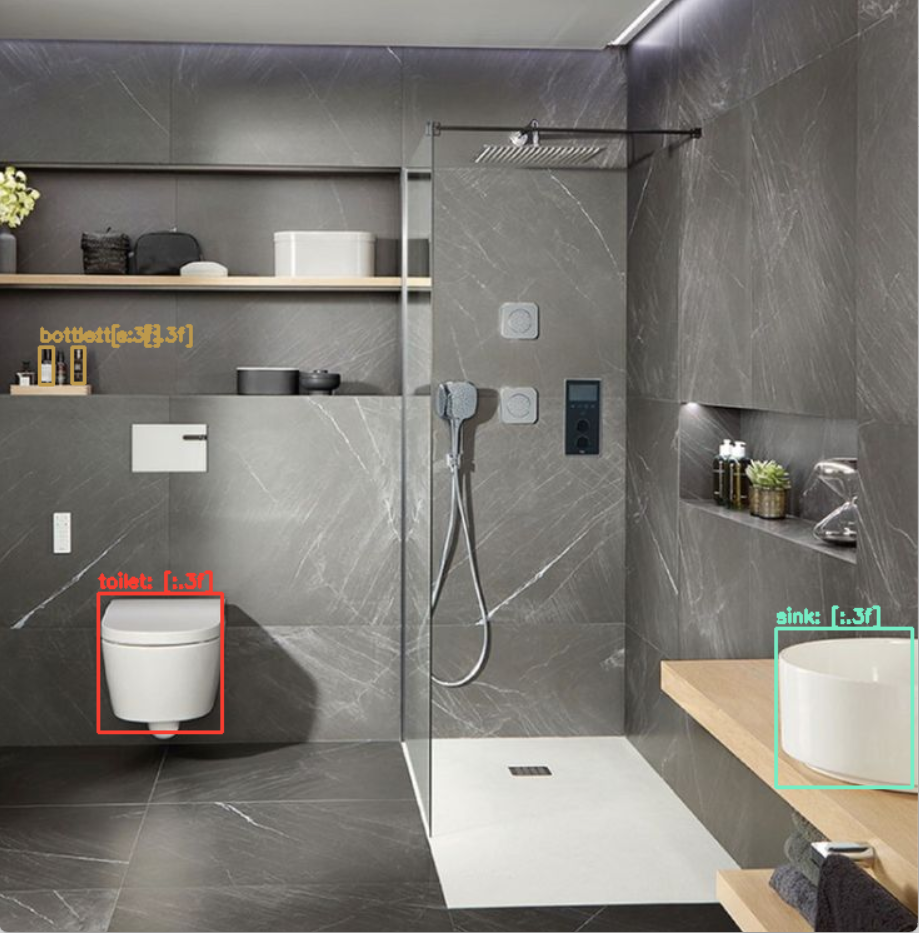

In [3]:
Image("Resultado deteccion de objetos.png", width = 500, height = 500)

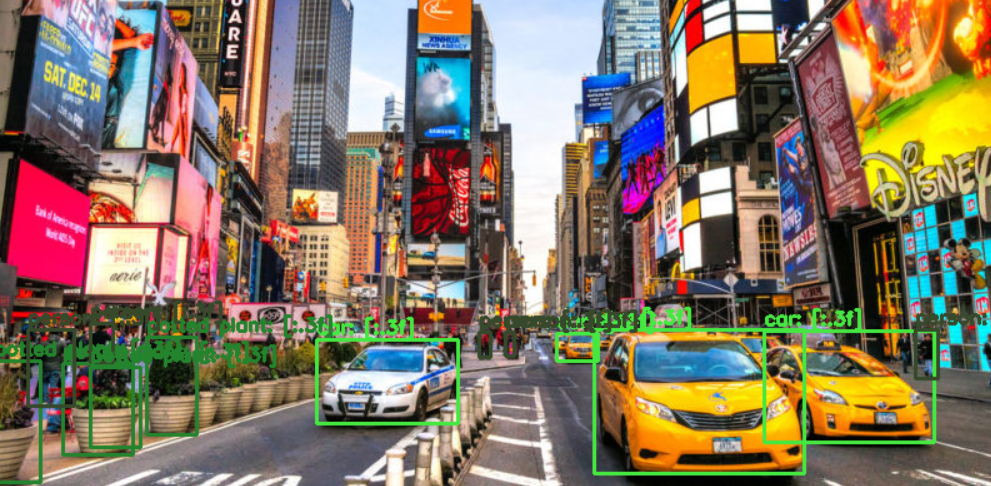

In [4]:
Image("2 Resultado deteccion.png", width = 800, height = 500)

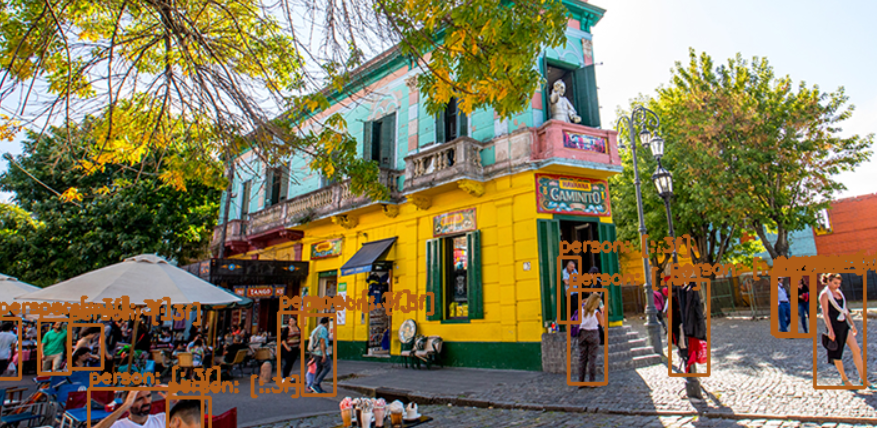

In [5]:
Image("3 Resultado deteccion.png", width = 800, height = 600)

**Como podemos observar detecta los objetos que hay en cada imagen**